In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from PIL import Image

In [13]:
df = pd.read_csv('/Users/piotr/GitHub/dwchallenge/challenge03/day03/dane/driving_log.csv', names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])

In [15]:
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,0.0,0.0,0,0.000004
1,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,0.0,0.0,0,0.000003
2,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,0.0,0.0,0,0.000008
3,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,0.0,0.0,0,0.000005
4,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,/Users/piotr/GitHub/dwchallenge/challenge03/da...,0.0,0.0,0,0.000004


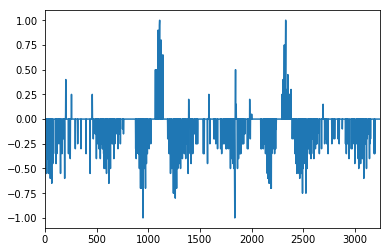

In [23]:
df['steering_angle'].plot()

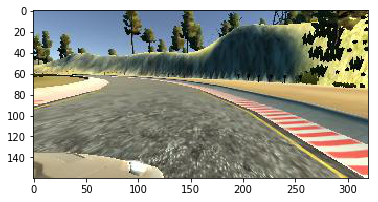

In [33]:
img = Image.open(df['right'][0])
plt.imshow(img)

In [32]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [36]:
def loadImage(fname):
    return np.asarray(Image.open(fname))

def processImage(img):
    return img[10:130:2, ::4, :]

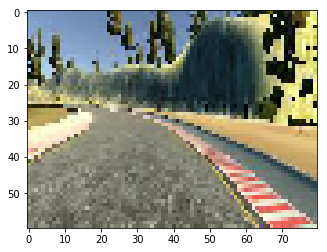

In [38]:
img = processImage( loadImage(df['right'][0]))
plt.imshow(img)

In [50]:
X = [processImage(loadImage(fname)) for fname in df['center']]

X += [processImage(loadImage(fname)) for fname in df['left']]
X += [processImage(loadImage(fname)) for fname in df['right']]

Y = np.array(df['steering_angle'])
Y = np.concatenate([Y, Y+0.4, Y-0.4])

In [51]:
X = np.array(X)
print( X.shape )
print( Y.shape )

(9720, 60, 80, 3)
(9720,)


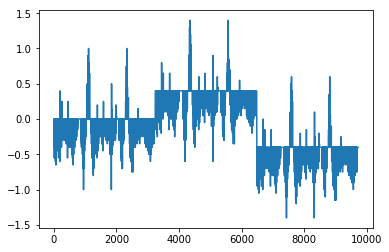

In [52]:
plt.plot(Y)
plt.show()

In [53]:
np.save('x.npy', X)
np.save('y.npy', Y)